In [1]:
import matplotlib.pyplot as plt
from binomial import Tree
from black_scholes import Path
import multiprocessing as mp
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

def get_error_from_depth(depth):
    return Tree(depth=depth, K=99, S0=100, r=0.06, sigma=0.2).root_option_diff()

def get_error_from_volatility(sigma):
    return Tree(depth=50, K=99, S0=100, r=0.06, sigma=sigma).root_option_diff()

def get_error_from_american_volatility_call(sigma):
    return Tree(depth=50, K=99, S0=100, r=0.06, sigma=sigma, call=True, american=True).root_option_diff()

def get_error_from_american_volatility_put(sigma):
    return Tree(depth=50, K=99, S0=100, r=0.06, sigma=sigma, call=False, american=True).root_option_diff()

def get_hedge_error_from_volatility(sigma):
    return Tree(depth=50, K=99, S0=100, r=0.06, sigma=sigma).root_hedge_diff()

def get_profit_from_volatility(sigma):
    results = np.empty((100, 1))
    for i in range(results.shape[0]):
        results[i] = Path(100, 0.2, sigma, 0.06, 1, 99, 365, 1).run()
    return results

def get_profit_from_hedge_adjustment(interval):
    results = np.empty((100, 1))
    for i in range(results.shape[0]):
        results[i] = Path(100, 0.2, 0.2, 0.06, 1, 99, 365, interval).run()
    return results

# Binomial Tree
## Absolute error

In [2]:
pool = mp.Pool()
results = pool.map(get_error_from_depth, range(2, 50))
pool.close()

In [1]:
plt.plot(np.abs(results))
# plt.plot([abs(results[i])/x for i, x in enumerate(range(2, 50))])
plt.grid()
plt.xlabel('Depth')
plt.ylabel('Absolute error')

NameError: name 'plt' is not defined

In [4]:
pool = mp.Pool()
results = pool.map(get_error_from_volatility, np.arange(0.1, 1, 0.1))
pool.close()

([<matplotlib.axis.XTick at 0x1a1aa6e208>,
 <a list of 9 Text xticklabel objects>)

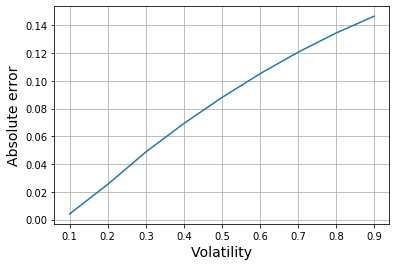

In [5]:
plt.plot(np.abs(results))
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Absolute error')
plt.xticks( range(len(results)), np.round(np.arange(0.1, 1, 0.1), 2))

In [8]:
pool = mp.Pool()
results_call = pool.map(get_error_from_american_volatility_call, np.arange(0.1, 1, 0.1))
results_put = pool.map(get_error_from_american_volatility_put, np.arange(0.1, 1, 0.1))
pool.close()

([<matplotlib.axis.XTick at 0x1a1acb7080>,
 <a list of 9 Text xticklabel objects>)

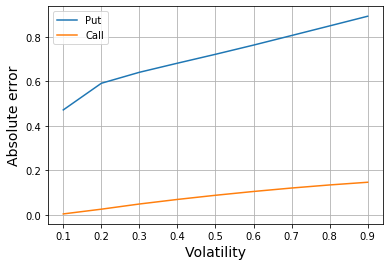

In [9]:
plt.plot(np.abs(results_put), label='Put')
plt.plot(np.abs(results_call), label='Call')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Absolute error')
plt.legend()
plt.xticks( range(len(results_put)), np.round(np.arange(0.1, 1, 0.1), 2))

## Hedge error

In [2]:
pool = mp.Pool()
results = pool.map(get_hedge_error_from_volatility, np.arange(0.1, 1, 0.1))
pool.close()

([<matplotlib.axis.XTick at 0x1a15fa6da0>,
 <a list of 9 Text xticklabel objects>)

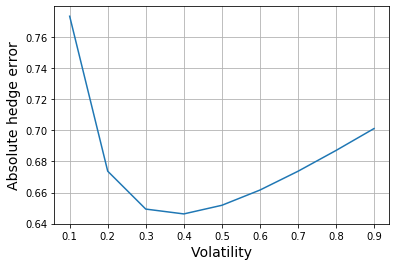

In [3]:
plt.plot(np.abs(results))
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Absolute hedge error')
plt.xticks( range(len(results)), np.round(np.arange(0.1, 1, 0.1), 2))

# Hedge Simulation

In [28]:
pool = mp.Pool()
results = pool.map(get_profit_from_volatility, [0.1, 0.2, 0.3])
pool.close()

([<matplotlib.axis.XTick at 0x1a228afd30>,
 <a list of 3 Text xticklabel objects>)

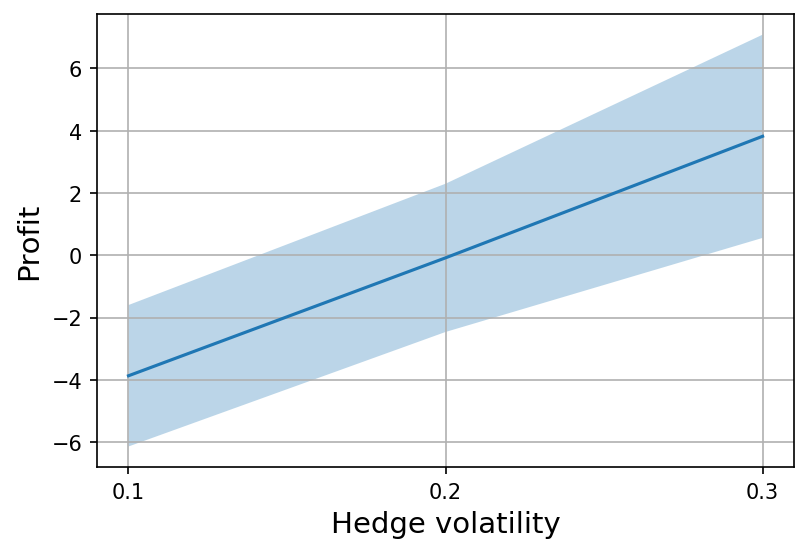

In [29]:
mean = np.mean(results, axis=1).flatten()
std = np.std(results, axis=1).flatten()

plt.plot(mean)
plt.fill_between(range(len(mean)), mean + std, mean - std, alpha=0.3)
plt.grid()
plt.xlabel('Hedge volatility')
plt.ylabel('Profit')
plt.xticks( range(len(results)), [0.1, 0.2, 0.3])

Text(0, 0.5, 'Frequency')

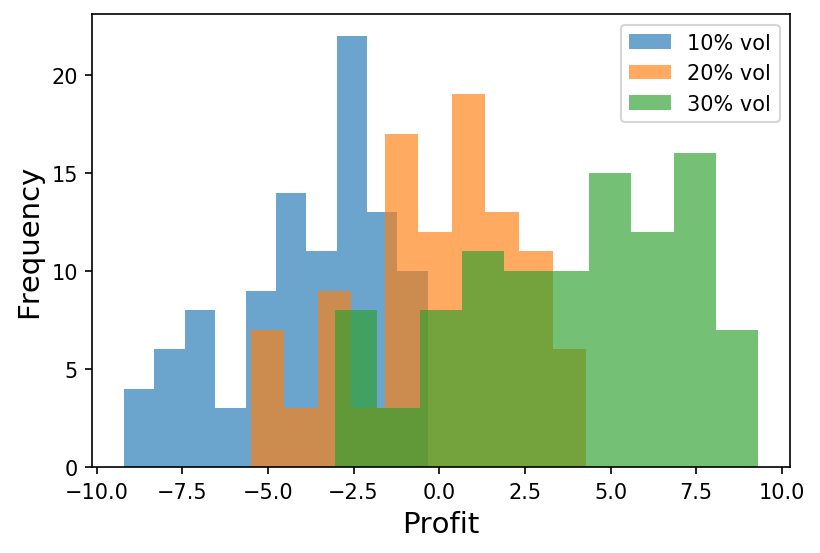

In [38]:
plt.hist(results[0], label='10% vol', alpha=0.66)
plt.hist(results[1], label='20% vol', alpha=0.66)
plt.hist(results[2], label='30% vol', alpha=0.66)
plt.legend()
plt.xlabel('Profit')
plt.ylabel('Frequency')

In [46]:
pool = mp.Pool()
results = pool.map(get_profit_from_hedge_adjustment, [1, 7, 30])
pool.close()

([<matplotlib.axis.XTick at 0x1a24808dd8>,
 <a list of 3 Text xticklabel objects>)

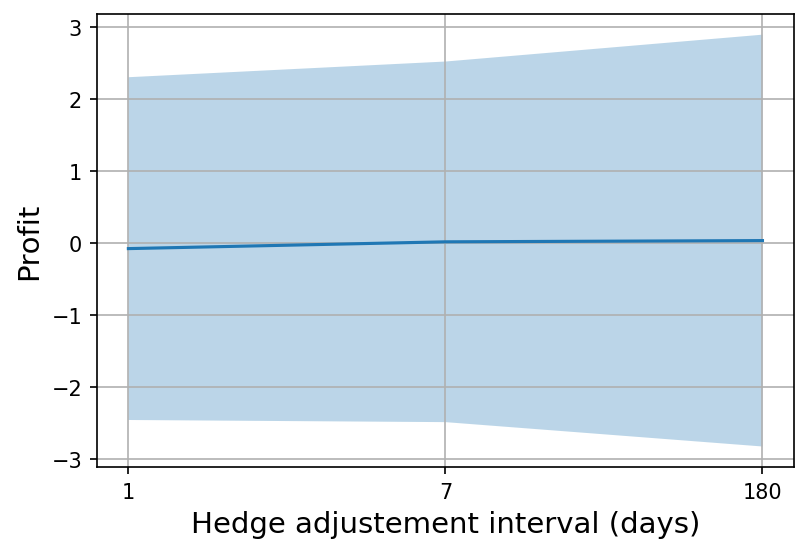

In [47]:
mean = np.mean(results, axis=1).flatten()
std = np.std(results, axis=1).flatten()

plt.plot(mean)
plt.fill_between(range(len(mean)), mean + std, mean - std, alpha=0.3)
plt.grid()
plt.xlabel('Hedge adjustement interval (days)')
plt.ylabel('Profit')
plt.xticks( range(len(results)), [1, 7, 180])

Text(0, 0.5, 'Frequency')

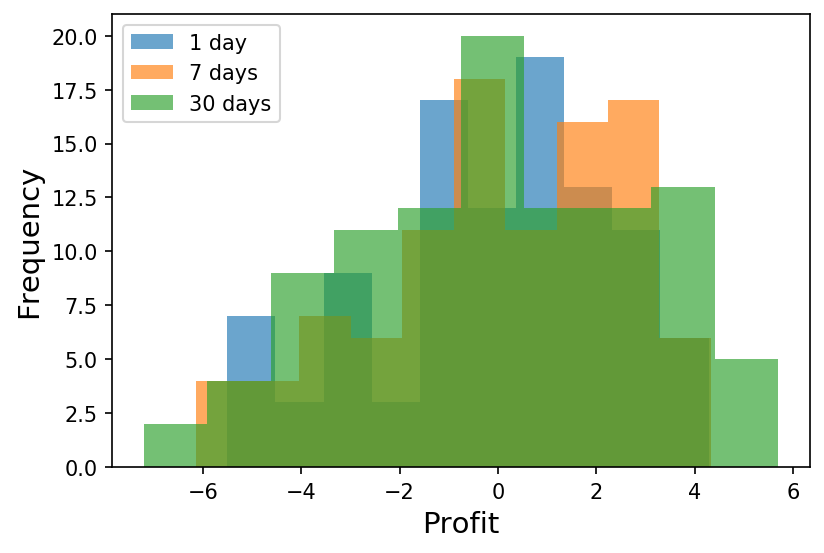

In [43]:
plt.hist(results[0], label='1 day', alpha=0.66)
plt.hist(results[1], label='7 days', alpha=0.66)
plt.hist(results[2], label='30 days', alpha=0.66)
plt.legend()
plt.xlabel('Profit')
plt.ylabel('Frequency')